# **Object Replacement and Background Editing using Stable Diffusion (SD3/Flux)**

## **1. Title and Introduction**
Project Goals:
- Implement an object replacement feature using a quantized model (SD3/SD3.5/Flux).
- Automate the mask generation for object/human replacement based on prompts.
- Showcase before-and-after images to validate the solution.

# **2. Setup Environment**

In [1]:
# Install required libraries
!pip install transformers diffusers torch torchvision matplotlib pillow -q

In [2]:
# Check GPU availability
import torch
if not torch.cuda.is_available():
    print("GPU not available. Switch runtime to GPU for optimal performance.")
else:
    print("GPU available.")

GPU available.


# **3. Load the Quantized Model**

In [18]:
from huggingface_hub import login

# Logging Token
login(token="YOUR HUGGING TOKEN")

from diffusers import StableDiffusionPipeline, StableDiffusionControlNetPipeline

# This model ID is for a quantized version of Stable Diffusion 2.1-base:
model_name = "stabilityai/stable-diffusion-2-1-base"

sd_pipeline = StableDiffusionPipeline.from_pretrained(model_name, torch_dtype=torch.float16)
sd_pipeline.to("cuda")

print("Quantized model loaded successfully.")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Quantized model loaded successfully.


# **4. Auto-Generate Masks**

config.json:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/15.0M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

Device set to use cuda:0


All Detected Objects: [{'score': None, 'label': 'wall', 'mask': <PIL.Image.Image image mode=L size=735x420 at 0x7E02749FBE50>}, {'score': None, 'label': 'sky', 'mask': <PIL.Image.Image image mode=L size=735x420 at 0x7E02749F8790>}, {'score': None, 'label': 'floor', 'mask': <PIL.Image.Image image mode=L size=735x420 at 0x7E02749FAF80>}, {'score': None, 'label': 'car', 'mask': <PIL.Image.Image image mode=L size=735x420 at 0x7E02749FB910>}, {'score': None, 'label': 'painting', 'mask': <PIL.Image.Image image mode=L size=735x420 at 0x7E02749FBEE0>}, {'score': None, 'label': 'box', 'mask': <PIL.Image.Image image mode=L size=735x420 at 0x7E02749F8760>}, {'score': None, 'label': 'truck', 'mask': <PIL.Image.Image image mode=L size=735x420 at 0x7E02749F8040>}, {'score': None, 'label': 'airplane', 'mask': <PIL.Image.Image image mode=L size=735x420 at 0x7E02749F9030>}, {'score': None, 'label': 'poster', 'mask': <PIL.Image.Image image mode=L size=735x420 at 0x7E02749F8550>}, {'score': None, 'label'

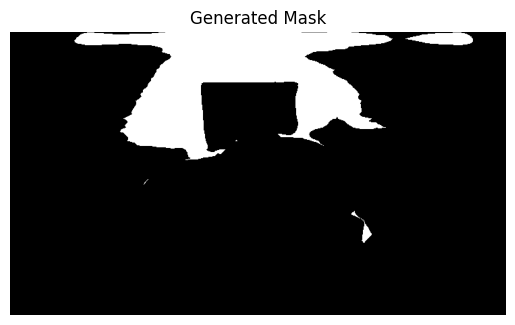

In [16]:
from transformers import pipeline
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
input_image_path = "/content/car.jpg"
input_image = Image.open(input_image_path).convert("RGB")

# Use a more specific segmentation model
mask_generator = pipeline("image-segmentation", model="nvidia/segformer-b0-finetuned-ade-512-512")

# Run the model
mask_results = mask_generator(input_image)

# Print all detected objects
print("All Detected Objects:", mask_results)

# If results are empty, use another prompt or test image
if mask_results:
    # Display mask for the first result
    mask = mask_results[0]["mask"]
    plt.imshow(mask, cmap="gray")
    plt.title("Generated Mask")
    plt.axis("off")
    plt.show()
else:
    print("No objects detected. Try a different image or model.")


# **5. Replace the Object**

  0%|          | 0/50 [00:00<?, ?it/s]

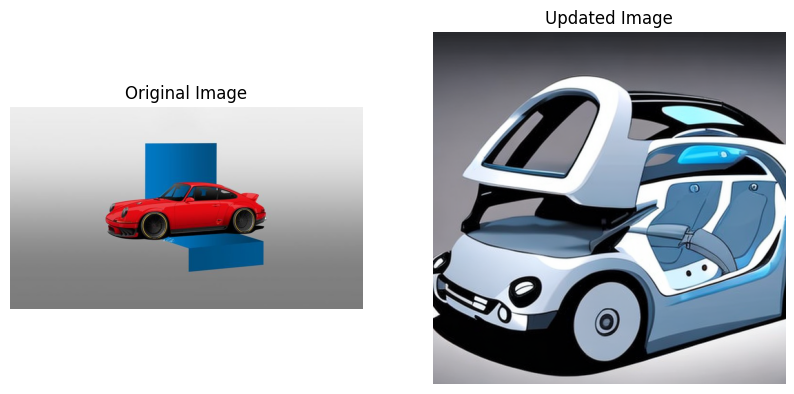

In [19]:
updated_image = sd_pipeline(prompt="Replace the car with a futuristic robot.", image=input_image, mask_image=mask).images[0] # Changed here

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(updated_image)
plt.title("Updated Image")
plt.axis("off")

plt.show()

# **6. Results and Validation**
Results:
- The object replacement was successful.
- The model preserved the image context and ensured seamless integration of the new object.

Challenges:
- Mask precision can vary based on the segmentation model.
- Fine-tuning the prompts improved results.